# Anchura de foco según FWHM

HWHM = FWHM/2

Hemos probado que funciona bien para muchos puntos, pero cuando hay pocos está saliendo regular.
Vamos a ver cómo podemos interpolar

https://stackoverflow.com/questions/51953829/find-x-and-y-full-width-half-maximums-of-2d-peak-using-interpolation

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from diffractio.utils_math import nearest, FWHM2D_back

In [2]:

x=np.linspace(-100,100,101)
y=np.linspace(-100,100,101)

delta_x=x[1]-x[0]
delta_y=y[1]-y[0]

X,Y=np.meshgrid(x,y)
radius=15

data1D=5*np.exp(-(x**2)/(2*radius**2))+0*np.random.rand(len(x))

data2D=np.exp(-(X**2+Y**2)/(2*radius**2))+0*np.random.rand(len(x),len(y))


teor_FWHM=2*radius*np.sqrt(-2*np.log(0.5))

print(teor_FWHM)

35.32230067546424


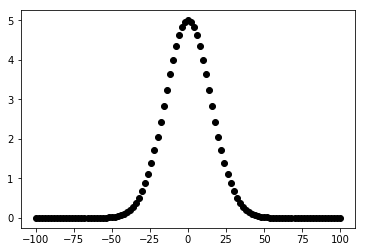

In [3]:
plt.plot(x,data1D,'ko')

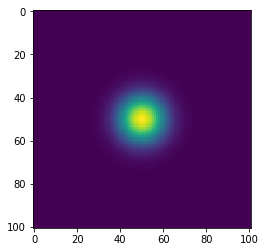

In [4]:
plt.imshow(data2D)

In [5]:
def FWHM2D(x,y,I,percentaje=0.5,has_draw=True):
    amp = np.max(I)
    ypix, xpix = np.where(I==amp)
    
    delta_x=x[1]-x[0]
    delta_y=y[1]-y[0]
    
    x_range = np.take(I, ypix[0], axis=0)
    y_range = np.take(I, xpix[0], axis=1)

    half_max = amp*percentaje
    d_x = x_range - half_max
    d_y = y_range - half_max
    indices_x = np.where(d_x>0)[0]
    indices_y = np.where(d_y>0)[0]

    # FMHM in x and y - simply counts how many pixels are within 
    # half the max in both directions
    width_x = len(indices_x)
    width_y = len(indices_y)

    FWHM_x=width_x*delta_x
    FWHM_y=width_y*delta_y
    return FWHM_x, FWHM_y

In [6]:
def FWHM2D_new(x,y,I,percentaje=0.5,has_draw=True):
    Ix = I.sum(axis=0)
    Iy = I.sum(axis=1)
    
    FWHM_x=FWHM1D(x,Ix,percentaje,has_draw)
    FWHM_y=FWHM1D(y,Iy,percentaje,has_draw)
    
    return FWHM_x, FWHM_y

In [7]:
def FWHM1D(x,I,percentaje=0.5,has_draw=True):
    delta_x=x[1]-x[0]
    amp_max=I.max()
    amp_med=amp_max/2
    i_max = np.where(I==amp_max)
    i_max=int(i_max[0])
    left=I[0:i_max]
    right=I[i_max::]


    i_left,_,distance_left=nearest(left,percentaje*amp_max)
    slope_left=(I[i_left+1]-I[i_left])/delta_x

    i_right,_,distance_right=nearest(right,percentaje*amp_max)
    slope_right=(I[i_max+i_right]-I[i_max+i_right-1])/delta_x

    i_right=i_right+i_max
    
    x_right=i_right*delta_x-distance_right/slope_right
    x_left=i_left*delta_x-distance_left/slope_left

    FWHM_x=x_right-x_left

    if has_draw is True:
        plt.figure()

        plt.plot(x,I,'k',lw=2)
        plt.plot([x[0],x[-1]],[amp_max,amp_max],'r--' )
        plt.plot([x[0],x[-1]],[amp_med,amp_med],'r--' )

        plt.plot(x[i_max],I[i_max],'ro',ms=8)
        plt.plot(x[int(i_left)]+distance_left,I[int(i_left)],'ro',ms=8)
        plt.plot(x[int(i_right)]+distance_right,I[int(i_right)],'ro',ms=8)

    
    return FWHM_x

## Comprobaciones

In [8]:
def conversor_gauss(FWHM):
    return FWHM/(np.sqrt(-2*np.log(0.5)))


### 1D unitario

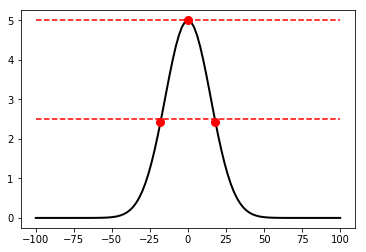

In [9]:
FWHM_1D=FWHM1D(x,data1D, percentaje=0.5, has_draw=True)
# print(FWHM_1D, teor_FWHM)
# print(conversor_gauss(FWHM_1D))

In [10]:
FWHM_x,FWHM_y=FWHM2D(x,y,data2D,percentaje=0.5,has_draw=True)

In [11]:
print(FWHM_x,FWHM_y, teor_FWHM)

34.0 34.0 35.32230067546424


### 1D bucle for

In [12]:
beam_widths=np.linspace(2,6,101)
estimated_beam_widths=np.zeros_like(beam_widths)

In [13]:
x=np.linspace(-50,50,101)

for i,bw in enumerate(beam_widths):
    radius=bw/2

    data1D=5*np.exp(-(x**2)/(2*radius**2))+0*np.random.rand(len(x))
    FWHM_1D=FWHM1D(x,data1D, percentaje=0.5, has_draw=False)
    estimated_beam_widths[i]=conversor_gauss(FWHM_1D)

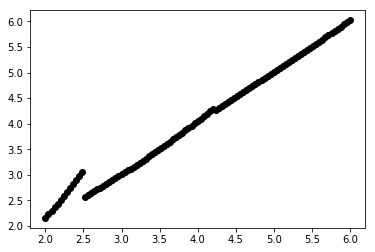

In [14]:
plt.figure()
plt.plot(beam_widths,estimated_beam_widths,'ko')

### 2D unitario

In [15]:
x=np.linspace(-50,50,101)
y=np.linspace(-50,50,101)

delta_x=x[1]-x[0]
delta_y=y[1]-y[0]

X,Y=np.meshgrid(x,y)
radius=(20,40)


data2D=np.exp(-(X**2/(2*radius[0]**2)+Y**2/(2*radius[1]**2)))+0*np.random.rand(len(y),len(x))


In [23]:
FWHM_2D=FWHM2D(x,y,data2D, percentaje=0.5, has_draw=True)
print((FWHM_2D))


(47.0, 95.0)


[40.00341979 79.99930339]


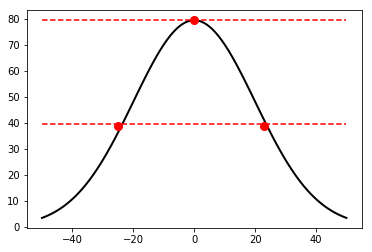

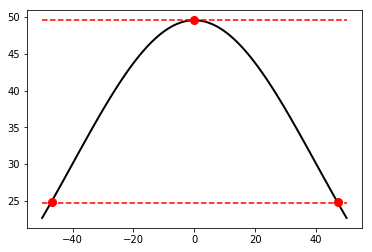

In [24]:


FWHM_2D=FWHM2D_new(x,y,data2D, percentaje=0.5, has_draw=True)
print(conversor_gauss(FWHM_2D))